In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd

fp = "/Users/valentinwolf/Documents/Studium/ETH/ASL/team042/benchmarking_files/descriptors_autotune_divisible_REP10_num_runs1"


In [139]:
false_arr = np.zeros((25,25))-1
true_arr = np.zeros((25,25))-1

for fn in os.listdir(fp):
    print(fn)
    if fn[-4:] != '.csv':
        continue
    params = fn[:-4].split('_')[-3:]
                                
    outer = int(params[0])
    inner = int(params[1])
    flip = params[2] == 'True'
    print(outer, inner, flip)
    
    cycles = pd.read_csv(os.path.join(fp,fn),header=None)[5].values[4]
    
    if flip:
        true_arr[outer, inner] = cycles
    else:
        false_arr[outer, inner] = cycles
        
    
    
true_arr = true_arr[1,1]/true_arr
false_arr = false_arr[1,1]/false_arr

get_msurf_descriptor_haar_unroll_1_2_True.csv
1 2 True
get_msurf_descriptor_haar_unroll_1_3_True.csv
1 3 True
get_msurf_descriptor_haar_unroll_4_1_False.csv
4 1 False
get_msurf_descriptor_haar_unroll_12_4_True.csv
12 4 True
get_msurf_descriptor_haar_unroll_4_24_True.csv
4 24 True
get_msurf_descriptor_haar_unroll_6_2_False.csv
6 2 False
get_msurf_descriptor_haar_unroll_24_6_True.csv
24 6 True
get_msurf_descriptor_haar_unroll_2_12_False.csv
2 12 False
get_msurf_descriptor_haar_unroll_24_4_False.csv
24 4 False
get_msurf_descriptor_haar_unroll_3_4_False.csv
3 4 False
get_msurf_descriptor_haar_unroll_1_8_True.csv
1 8 True
get_msurf_descriptor_haar_unroll_6_24_False.csv
6 24 False
get_msurf_descriptor_haar_unroll_1_24_False.csv
1 24 False
get_msurf_descriptor_haar_unroll_12_6_False.csv
12 6 False
get_msurf_descriptor_haar_unroll_6_4_True.csv
6 4 True
get_msurf_descriptor_haar_unroll_8_1_False.csv
8 1 False
get_msurf_descriptor_haar_unroll_2_6_False.csv
2 6 False
get_msurf_descriptor_haar_unr

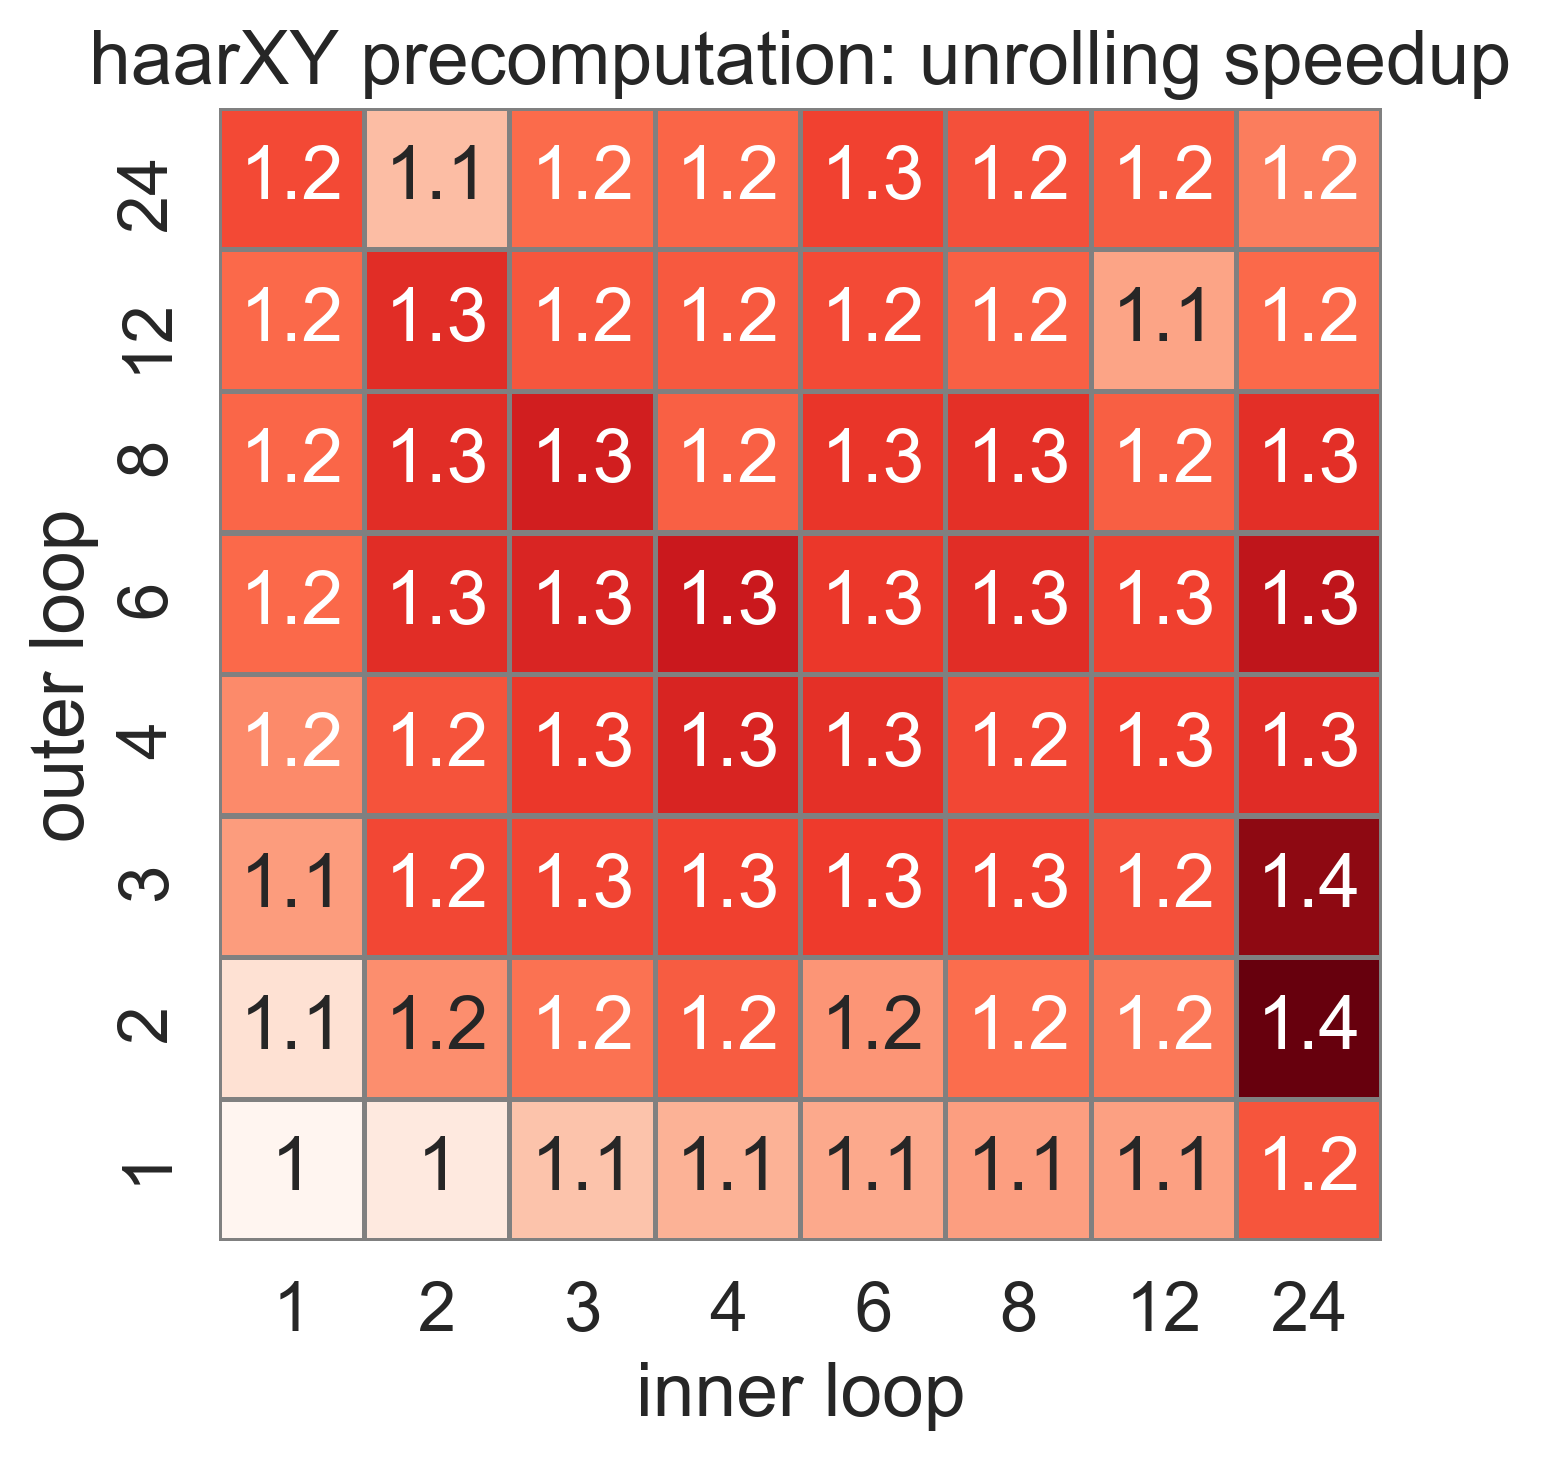

In [140]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

sns.set(font_scale=1.5)
plt.figure(figsize=(5,5))
ax = sns.heatmap(false_arr[[1, 2, 3, 4, 6, 8, 12, 24][::-1]][:,[1, 2, 3, 4, 6, 8, 12, 24]],
            yticklabels=[1, 2, 3, 4, 6, 8, 12, 24][::-1],
            xticklabels=[1, 2, 3, 4, 6, 8, 12, 24],
            linewidths=1,
            linecolor='gray',
            cbar=False,
#             cbar_kws={'label': 'speedup', "orientation": "horizontal", "fraction":0.05, "aspect":40, "pad"},
            cmap="Reds",
            annot=True,        
           )

ax.set(xlabel='inner loop', ylabel='outer loop', title="haarXY precomputation: unrolling speedup")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
plt.show()

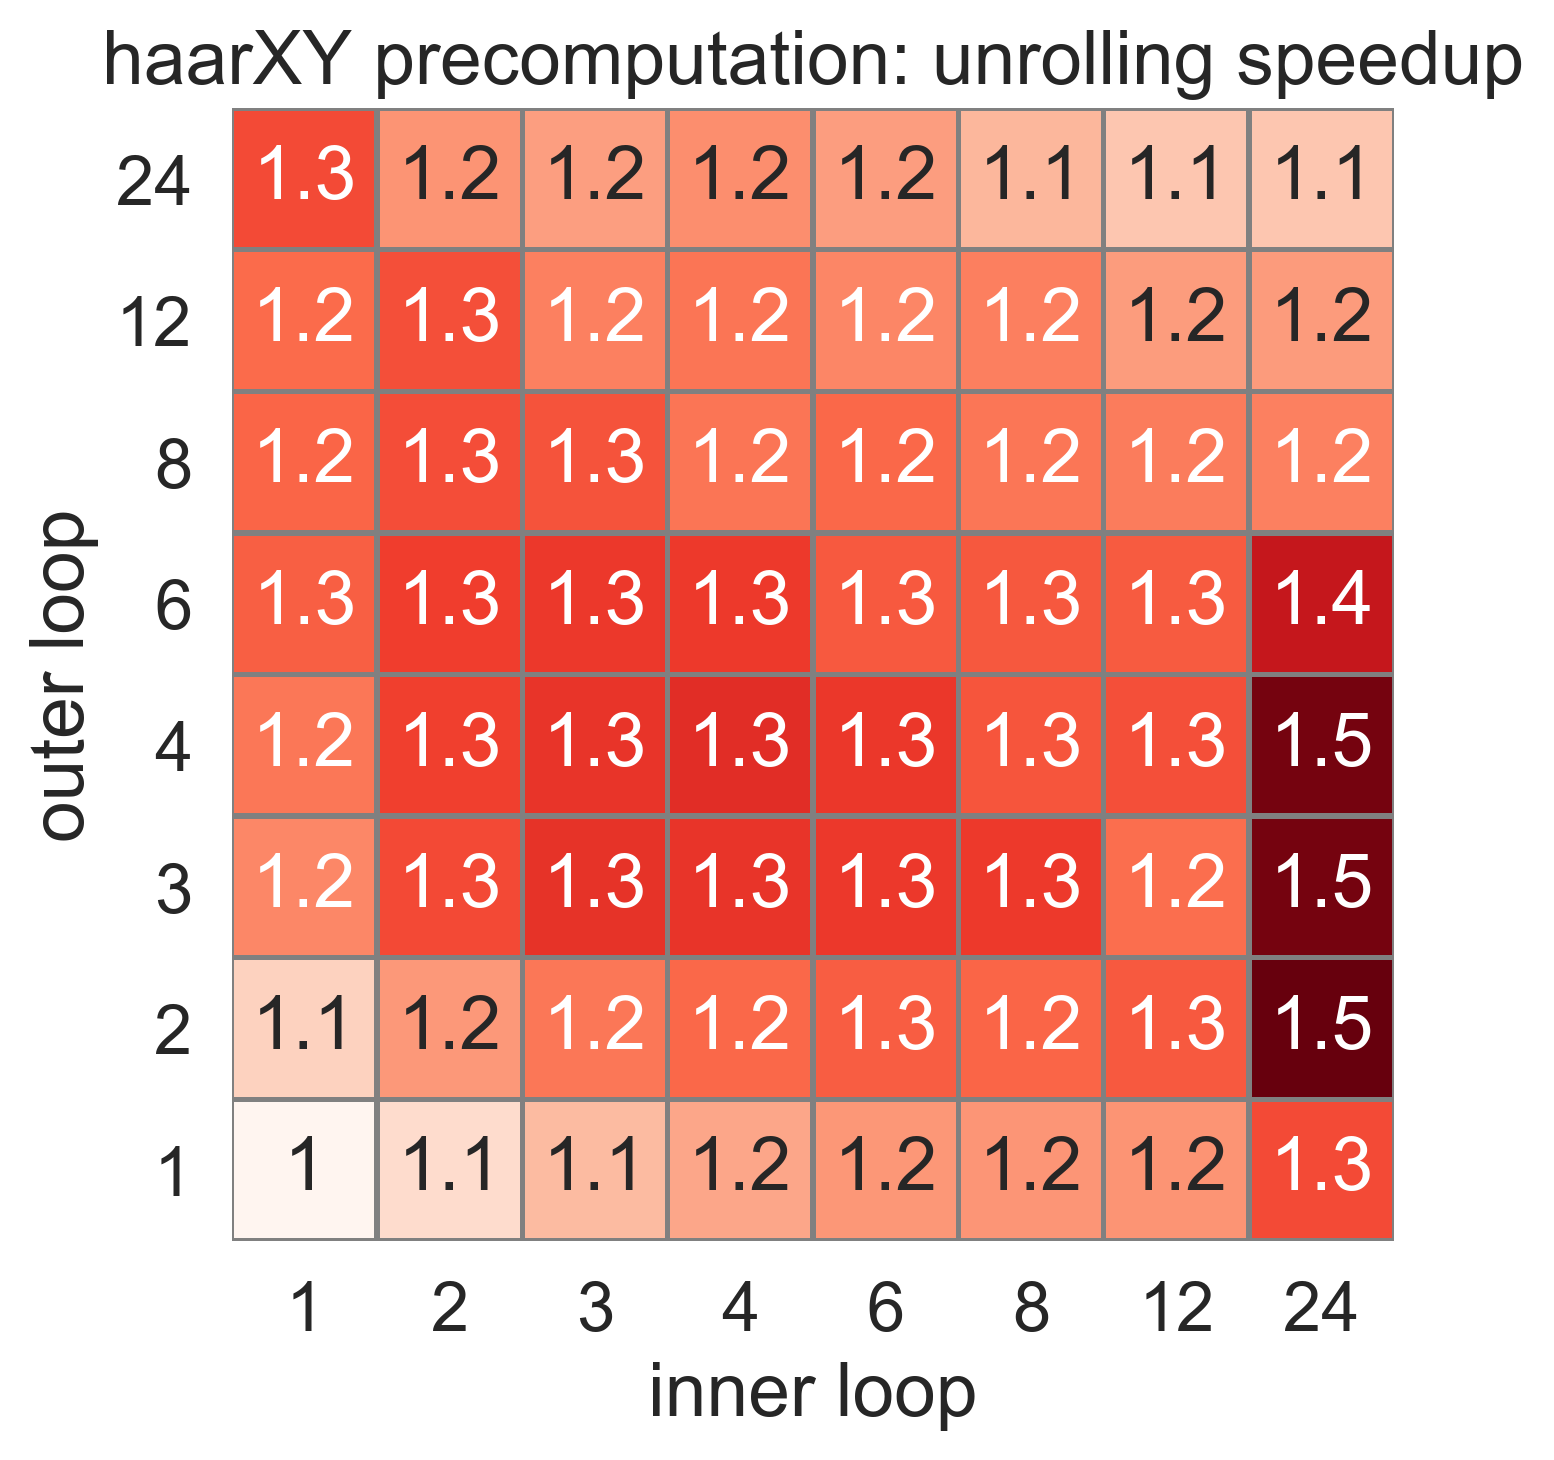

In [142]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

sns.set(font_scale=1.5)
plt.figure(figsize=(5,5))
ax = sns.heatmap(true_arr[[1, 2, 3, 4, 6, 8, 12, 24][::-1]][:,[1, 2, 3, 4, 6, 8, 12, 24]],
            yticklabels=[1, 2, 3, 4, 6, 8, 12, 24][::-1],
            xticklabels=[1, 2, 3, 4, 6, 8, 12, 24],
            linewidths=1,
            linecolor='gray',
            cbar=False,
#             cbar_kws={'label': 'speedup', "orientation": "horizontal", "fraction":0.05, "aspect":40, "pad"},
            cmap="Reds",
            annot=True,        
           )

ax.set(xlabel='inner loop', ylabel='outer loop', title="haarXY precomputation: unrolling speedup")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
plt.yticks(rotation=0) 
plt.show()